In [68]:
import os
!pip install pandas
!pip install matplotlib

In [69]:
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import discriminant_analysis
from sklearn import neighbors
from sklearn import tree
from sklearn import naive_bayes
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from mpl_toolkits import mplot3d


# Importing the dataset (Smartphone-Based Recognition of Human Activities and Postural Transitions)

In [70]:
with open('resources/HAPT Data Set/features.txt', 'r') as f:
    names = f.readlines()
columns_names = []
for name in names: # removes " \n" at the end of the column's name
    name = name.strip()
    columns_names.append(name)


## Cleaning the columns' names

When I tried to add the columns_name array as a parameter of the X_train DataFrame, an error occurred. "ValueError: Duplicate names are not allowed." So I made a for loop that would fill a "pairs" array with the columns' names that appear more than once, to know which column's name needs to be modified.

In [71]:
names_array = []
pairs = []

for name in columns_names:
    if name not in names_array:
        names_array.append(name)
    elif name not in pairs:
        pairs.append(name)
    else:
        pass

def change_end(end_of_name, keep):
    i = 2
    name_before = ''
    beginning_of_name = ''
    for j in range(len(columns_names)):
        if columns_names[j].endswith(end_of_name):
            beginning_of_name = columns_names[j].split("-")[0]
            if beginning_of_name == name_before:
                columns_names[j] = columns_names[j].replace(end_of_name, keep + str(i))
                i += 1
                name_before = beginning_of_name
            else:
                name_before = beginning_of_name
                i = 2
    
def change_end_bis(entire_name):
    i = 1
    while i < 4:
        for j in range(len(columns_names)):
            if columns_names[j] == entire_name:
                columns_names[j] = columns_names[j].replace(columns_names[j][-1], str(i))
                i += 1

change_end('ropy-1', 'ropy-')
change_end_bis('fBodyAcc-Skewness-1')
change_end_bis('fBodyAcc-Kurtosis-1')
change_end_bis('fBodyAccJerk-Skewness-1')
change_end_bis('fBodyAccJerk-Kurtosis-1')
change_end_bis('fBodyGyro-Skewness-1')
change_end_bis('fBodyGyro-Kurtosis-1')

## Importing the dataset (the end)

In [72]:
X_train = pd.read_table("resources/HAPT Data Set/Train/X_train.txt", delimiter=" ", names=columns_names)
Y_train = pd.read_table("resources/HAPT Data Set/Train/y_train.txt", names=['Posture'])

X_test = pd.read_table("resources/HAPT Data Set/Test/X_test.txt", delimiter=" ", names=columns_names)
Y_test = pd.read_table("resources/HAPT Data Set/Test/y_test.txt", names=['Posture'])
# train_df = pd.read_table("resources/HAPT Data Set/Train/X_train.txt", delimiter=" ")
# train_df.columns = [columns_names]
# train_df["Posture"] = pd.read_table("resources/HAPT Data Set/Train/y_train.txt")

# full_df = pd.DataFrame(X_train)
# full_df['Posture'] = Y_train

## Looking at the data

In [73]:
print("Head of X_train:\n{}".format(X_train.head())) # shows the first 5 rows of the DataFrame
print("Shape of X_train: {}".format(X_train.shape)) # gives the dimensions of the DataFrame
print("Description of X_train:\n{}".format(X_train.describe())) # gives a statistical description of the DataFrame
print("Null values are contained in the DataFrame? {}".format(X_train.isnull().values.any())) # checks if the DataFrame contains null values.

Head of X_train:
   tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  \
0         0.043580        -0.005970        -0.035054       -0.995381   
1         0.039480        -0.002131        -0.029067       -0.998348   
2         0.039978        -0.005153        -0.022651       -0.995482   
3         0.039785        -0.011809        -0.028916       -0.996194   
4         0.038758        -0.002289        -0.023863       -0.998241   

   tBodyAcc-STD-2  tBodyAcc-STD-3  tBodyAcc-Mad-1  tBodyAcc-Mad-2  \
0       -0.988366       -0.937382       -0.995007       -0.988816   
1       -0.982945       -0.971273       -0.998702       -0.983315   
2       -0.977314       -0.984760       -0.996415       -0.975835   
3       -0.988569       -0.993256       -0.996994       -0.988526   
4       -0.986774       -0.993115       -0.998216       -0.986479   

   tBodyAcc-Mad-3  tBodyAcc-Max-1  ...  fBodyGyroJerkMag-MeanFreq-1  \
0       -0.953325       -0.794796  ...                    -0.012

# Data visualisation

I decided to plot (tBodyAcc-STD-1, tBodyAcc-STD-2, tBodyAcc-STD-3) and Postures for the first 
3D scatter plot and (tBodyGyro-STD-1, tBodyGyro-STD-2, tBodyGyro-STD-3) and Postures for the 
second one.
I think that looking at the standard deviation is a good way to guess the different types of 
posture. We can easily guess that if the standard deviation close to 0, the user is probably 
laying, sitting or standing whereas if the standard deviation bigger or smaller than 0, we 
can guess that the user is moving.

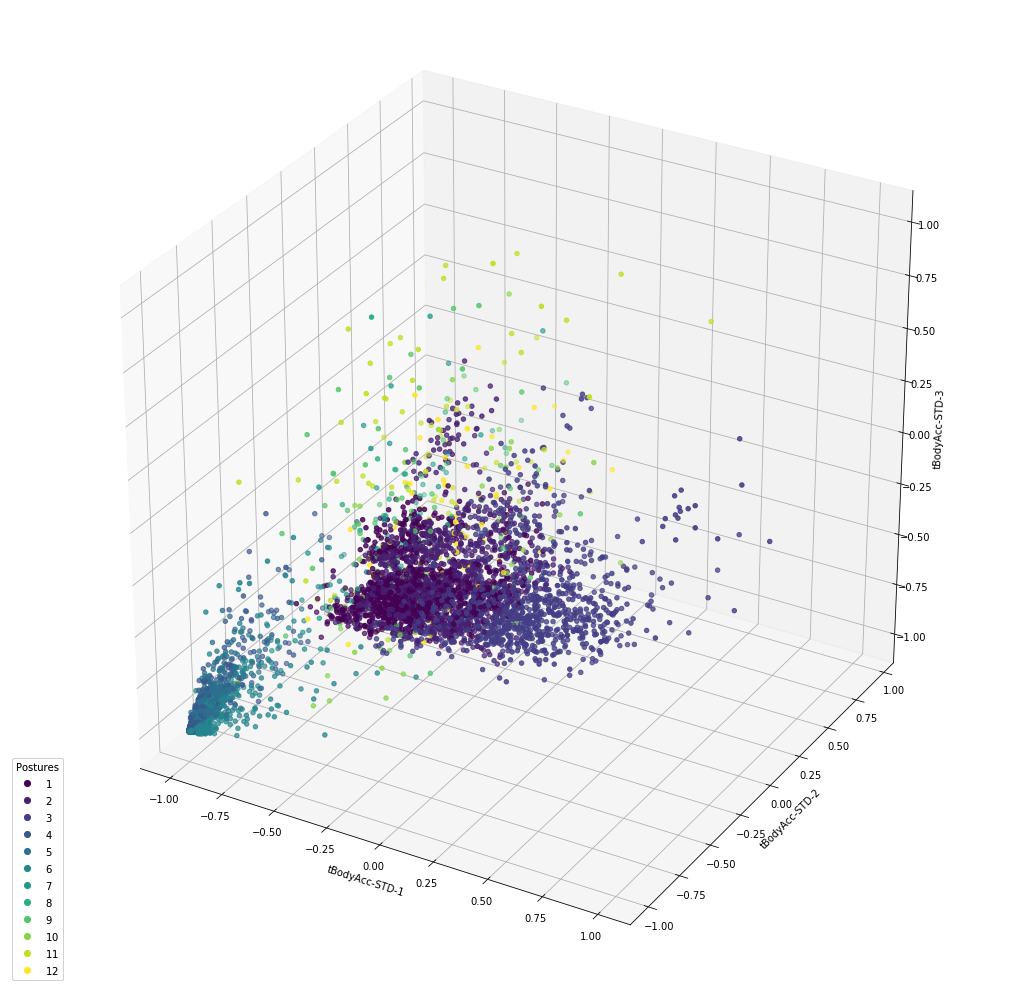

In [74]:
fig = matplotlib.pyplot.figure(figsize=[18, 18])
ax_1 = matplotlib.pyplot.axes(projection='3d')
scatter = ax_1.scatter3D(X_train['tBodyAcc-STD-1'], X_train['tBodyAcc-STD-2'], X_train['tBodyAcc-STD-3'], c=Y_train['Posture'])
ax_1.set_xlabel('tBodyAcc-STD-1')
ax_1.set_ylabel('tBodyAcc-STD-2')
ax_1.set_zlabel('tBodyAcc-STD-3')
legend1 = ax_1.legend(*scatter.legend_elements(), loc="lower left", title="Postures")
ax_1.add_artist(legend1)

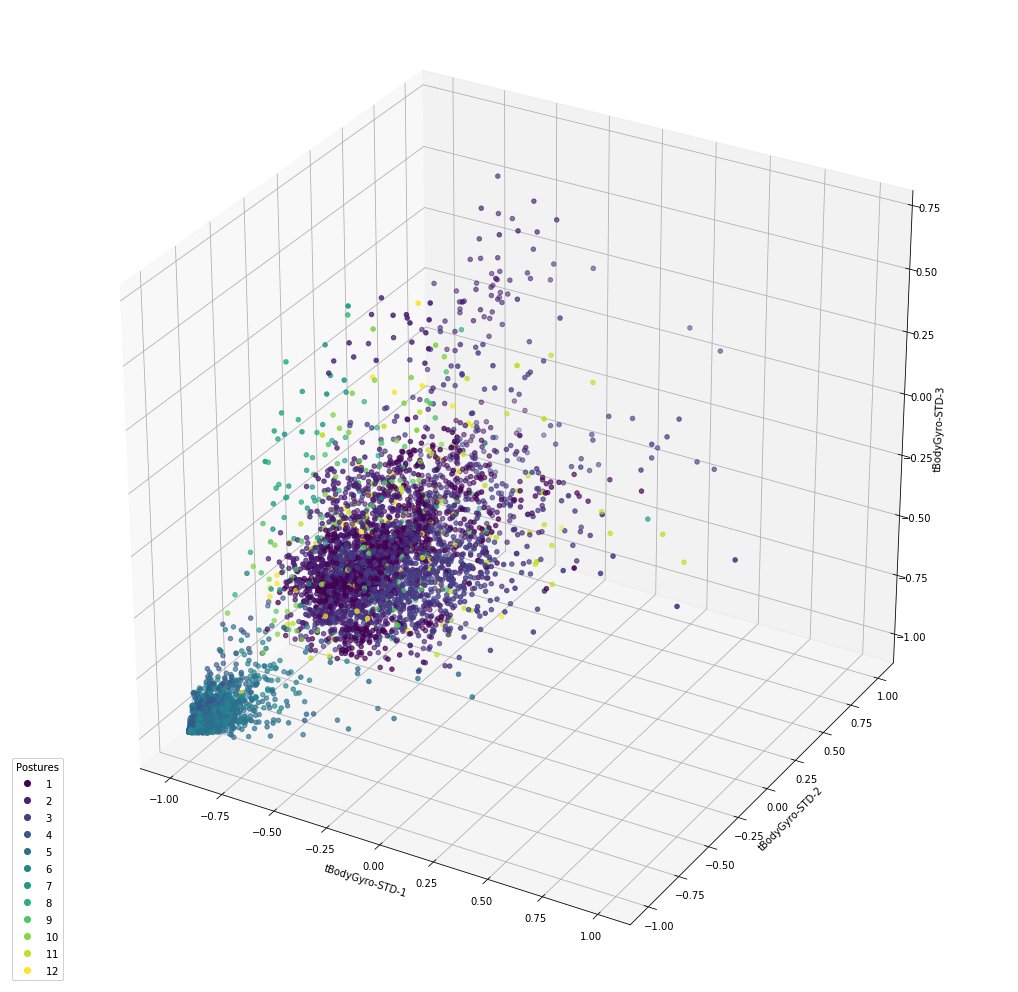

In [75]:
fig_2 = matplotlib.pyplot.figure(figsize=[18, 18])
ax_2 = matplotlib.pyplot.axes(projection='3d')
scatter_2 = ax_2.scatter3D(X_train['tBodyGyro-STD-1'], X_train['tBodyGyro-STD-2'], X_train['tBodyGyro-STD-3'], c=Y_train['Posture'])
ax_2.set_xlabel('tBodyGyro-STD-1')
ax_2.set_ylabel('tBodyGyro-STD-2')
ax_2.set_zlabel('tBodyGyro-STD-3')
legend1 = ax_2.legend(*scatter_2.legend_elements(), loc="lower left", title="Postures")
ax_2.add_artist(legend1)


# Models

Here, we are working on the classification of the users' postures.


In [76]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(neighbors.KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging_clf.fit(X_train, Y_train.values.ravel())
Y_bagging_clf_pred = bagging_clf.predict(X_test)

print("Accuracy score for BaggingClassifier: {}".format(accuracy_score(Y_test.values.ravel(), Y_bagging_clf_pred)))

Accuracy score for BaggingClassifier: 0.8931056293485136


In [77]:
# svc_clf = svm.SVC(gamma=0.001, C=100.) # clf = classifier
svc_clf = svm.SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]} # To find which one is the best: linearSVC or nuSVC?
clf = sklearn.model_selection.GridSearchCV(svc_clf, parameters)
clf.fit(X_train, Y_train.values.ravel())
Y_svc_pred = clf.predict(X_test)

print("Accuracy score for SVC: {}".format(accuracy_score(Y_test.values.ravel(), Y_svc_pred)))

Accuracy score for SVC: 0.9516129032258065


In [78]:
knn = neighbors.KNeighborsClassifier()
parameters = {'n_neighbors':[1, 3, 5]}
knn = sklearn.model_selection.GridSearchCV(knn, parameters)
knn.fit(X_train, Y_train.values.ravel())
Y_knc_pred = knn.predict(X_test)

print("Accuracy score for KNeighborsClassifier: {}".format(accuracy_score(Y_test.values.ravel(), Y_knc_pred)))

Accuracy score for KNeighborsClassifier: 0.8848829854522454


In [79]:
dt_clf_before = tree.DecisionTreeClassifier()

depths = np.arange(1, 21)
num_leaf_nodes = [1, 5, 10, 20, 50, 100]
tree_param_grid = [{'max_depth':depths,
              'max_features':num_leaf_nodes}]
dt_clf = sklearn.model_selection.GridSearchCV(dt_clf_before, tree_param_grid)

dt_clf.fit(X_train, Y_train.values.ravel())
Y_dt_clf_pred = dt_clf.predict(X_test)
print("Accuracy score for DecisionTreeClassifier: {}".format(accuracy_score(Y_test.values.ravel(), Y_dt_clf_pred)))


Accuracy score for DecisionTreeClassifier: 0.8156230234029096


In [80]:
# gnb_clf = naive_bayes.GaussianNB() # pas adapté ici
# gnb_clf.fit(X_train, Y_train.values.ravel())
# Y_gnb_clf_pred = dt_clf.predict(X_test)
# print("Accuracy score for GaussianNB: {}".format(accuracy_score(Y_test.values.ravel(), Y_gnb_clf_pred)))


In [81]:
with open('resources/HAPT Data Set/activity_labels.txt', 'r') as f:
    postures_labels = f.readlines()
for i in range(len(postures_labels)):
    postures_labels[i] = postures_labels[i].strip()

In [82]:
predictions = [Y_bagging_clf_pred, Y_svc_pred, Y_knc_pred, Y_dt_clf_pred]

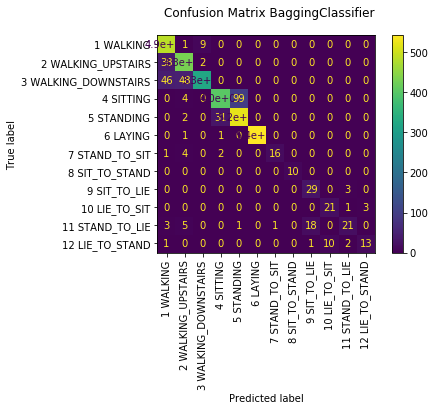

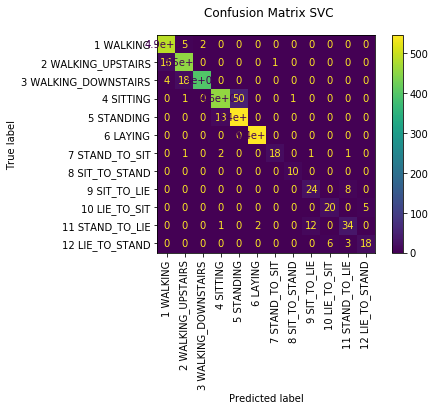

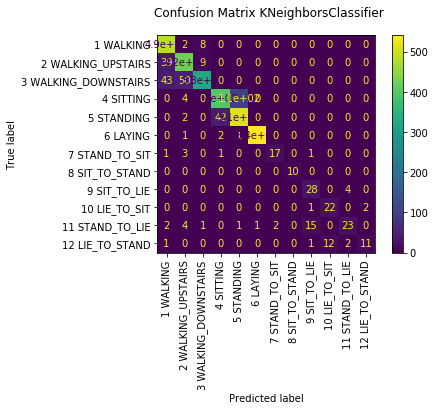

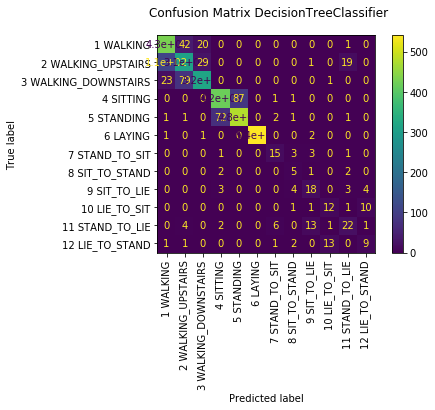

In [83]:
names = ["BaggingClassifier", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier"]
clfs = [bagging_clf, clf, knn, dt_clf]
for i in range(len(clfs)):
    disp = sklearn.metrics.plot_confusion_matrix(clfs[i], X_test, Y_test.values.ravel(), display_labels=postures_labels, xticks_rotation='vertical')
    disp.figure_.suptitle("Confusion Matrix " + names[i])


# Cross-validation

In [84]:
results_mean = {}
results = []
names_cv = ["KNeighborsClassifier"]
clfs_cross_val = [knn]
for i in range(len(clfs_cross_val)):
    print(names_cv[i])
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = model_selection.cross_val_score(clfs_cross_val[i], X_train, Y_train.values.ravel(), cv=kfold, scoring='accuracy')
    print(cv_results)
    results_mean[names[i]] = cv_results.mean()
    results.append(cv_results)

KNeighborsClassifier
[0.93822394 0.95495495 0.95752896 0.95881596 0.94723295 0.94723295
 0.95109395 0.96134021 0.95489691 0.95876289]


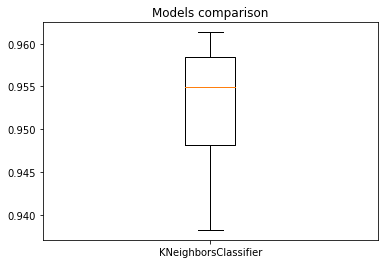

In [85]:
names_cv = ["KNeighborsClassifier"]
matplotlib.pyplot.boxplot(results, labels=names_cv)
matplotlib.pyplot.title('Models comparison')
matplotlib.pyplot.show()
    

## Evaluate the models

In [86]:
for prediction in predictions:
    r2_result = sklearn.metrics.r2_score(Y_test, prediction)
    print(r2_result)

0.8933297419173176
0.9706704610173139
0.8991956497138549
0.7672127242917673


In [87]:
for prediction in predictions:
    print(sklearn.metrics.mean_squared_error(Y_test, prediction))
    

0.5290955091714105
0.1454775458570525
0.5
1.1546489563567361


# Save a model

In [88]:
from joblib import dump, load
dump(clf, 'best_posture_prediction_model.joblib')

test_clf = load('best_posture_prediction_model.joblib')
test_clf.predict(X_test)

array([5, 5, 5, ..., 2, 2, 2])

# Keep only the relevant columns
This time, I used the 4 models on "smaller" dataframes.

In [89]:
full_df = pd.read_table("resources/HAPT Data Set/Train/X_train.txt", delimiter=" ", names=columns_names)
full_df['Posture'] = pd.read_table("resources/HAPT Data Set/Train/y_train.txt")

corr = full_df.corr(method='pearson')['Posture'] # ['Posture'][full_df.corr(method='pearson')['Posture'] < 1].abs()
# corr_result = corr.sort_values(ascending=True).head(100)
# print(corr.max())
# print(corr.min())
print(corr)

tBodyAcc-Mean-1                   -0.076074
tBodyAcc-Mean-2                    0.165176
tBodyAcc-Mean-3                    0.127039
tBodyAcc-STD-1                    -0.599498
tBodyAcc-STD-2                    -0.553335
                                     ...   
tBodyGyroJerk-AngleWRTGravity-1   -0.002800
tXAxisAcc-AngleWRTGravity-1        0.493403
tYAxisAcc-AngleWRTGravity-1       -0.528187
tZAxisAcc-AngleWRTGravity-1       -0.434973
Posture                            1.000000
Name: Posture, Length: 562, dtype: float64


In [90]:
print(corr.sort_values())

fBodyAccJerk-ropy-1   -0.685428
tBodyAccJerk-Mad-2    -0.684655
tBodyAccJerk-ropy-1   -0.682821
fBodyAccJerk-STD-2    -0.681743
tBodyAccJerk-IQR-2    -0.680247
                         ...   
tBodyAccJerk-Min-3     0.618556
tBodyAcc-Min-2         0.619389
tBodyAccJerk-Min-2     0.656792
tBodyAccJerk-Min-1     0.670389
Posture                1.000000
Name: Posture, Length: 562, dtype: float64


In [91]:
relevant_columns = []
alpha = 0.05
for i in range(len(corr)):
    if corr[i] <= alpha:
        relevant_columns.append(corr.index[i])
len(relevant_columns)

457

In [92]:
relevant_df_train = pd.DataFrame(columns=relevant_columns)

for name in relevant_columns:
    relevant_df_train[name] = full_df[name]
    

In [93]:
relevant_df_test = pd.DataFrame(columns=relevant_columns)

for name in relevant_columns:
    relevant_df_test[name] = X_test[name]

In [94]:
bagging_clf_relevant = BaggingClassifier(neighbors.KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging_clf_relevant.fit(relevant_df_train, Y_train.values.ravel())
Y_bagging_clf_relevant_pred = bagging_clf_relevant.predict(relevant_df_test)

print("Accuracy score for BaggingClassifier: {}".format(accuracy_score(Y_test.values.ravel(), Y_bagging_clf_relevant_pred)))

Accuracy score for BaggingClassifier: 0.8725490196078431


In [95]:
# svc_clf = svm.SVC(gamma=0.001, C=100.) # clf = classifier
svc_clf_relevant = svm.SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]} # To find which one is the best: linearSVC or nuSVC?
clf_relevant = sklearn.model_selection.GridSearchCV(svc_clf_relevant, parameters)
clf_relevant.fit(relevant_df_train, Y_train.values.ravel())
Y_svc_pred_relevant = clf_relevant.predict(relevant_df_test)

print("Accuracy score for SVC: {}".format(accuracy_score(Y_test.values.ravel(), Y_svc_pred_relevant)))

Accuracy score for SVC: 0.9443390259329538


In [96]:
knn_relevant = neighbors.KNeighborsClassifier()
parameters = {'n_neighbors':[1, 3, 5]}
knn_relevant = sklearn.model_selection.GridSearchCV(knn_relevant, parameters)
knn_relevant.fit(relevant_df_train, Y_train.values.ravel())
Y_knc_pred_relevant = knn_relevant.predict(relevant_df_test)

print("Accuracy score for KNeighborsClassifier: {}".format(accuracy_score(Y_test.values.ravel(), Y_knc_pred_relevant)))

Accuracy score for KNeighborsClassifier: 0.8646426312460468


In [97]:
dt_clf_before = tree.DecisionTreeClassifier()

depths = np.arange(1, 21)
num_leaf_nodes = [1, 5, 10, 20, 50, 100]
tree_param_grid = [{'max_depth':depths,
              'max_features':num_leaf_nodes}]
dt_clf_relevant = sklearn.model_selection.GridSearchCV(dt_clf_before, tree_param_grid)

dt_clf_relevant.fit(relevant_df_train, Y_train.values.ravel())
Y_dt_clf_pred_relevant = dt_clf_relevant.predict(relevant_df_test)
print("Accuracy score for DecisionTreeClassifier: {}".format(accuracy_score(Y_test.values.ravel(), Y_dt_clf_pred_relevant)))

Accuracy score for DecisionTreeClassifier: 0.8415559772296015
